In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.datasets import mnist
from keras.utils import to_categorical
np.set_printoptions(linewidth=200) # No. of characters per line displayed.
%matplotlib inline

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
print('# of training images:', train_images.shape[0])
print('# of test images:', test_images.shape[0])

# of training images: 60000
# of test images: 10000


In [21]:
def display_image(position):
    image = train_images[position]
    plt.title('Example %d. Label: %d' % (position, train_labels[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

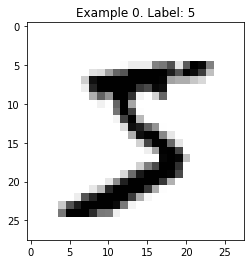

In [24]:
display_image(0)

In [30]:
train_labels_count = np.unique(train_labels, return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

![lenet.png](./lenet.png)

In [ ]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
EPOCHS = 5
BATCH_SIZE = 64

In [ ]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE)

In [ ]:
X_train, y_train = train['features'], to_categorical(train['labels'])
X_validation, y_validation = validation['features'], to_categorical(validation['labels'])

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard